# **Club Football Match Analysis**
<img src="https://img.freepik.com/premium-photo/blue-sphere-with-words-connected-bottom_1026912-30470.jpg?w=996" alt="Foto Dataset" width="200">

L'idea di base e' quella di capire come sia evoluto il calcio negli ultimi 25 anni, evidentemente il modo di giocare e' cambiato tanto negli anni, ma per capire se questi cambiamenti, cosi' come le nuove regole, l'introduzione del VAR, abbiano avuto un impatto sui risultati bisogna analizzare i dati📊

# Il DataSet
Il seguente progetto e' stato realizzato su un DataSet pubblico, disponibile sul web,  contenete informazioni su partite di calcio dal 2000 al 2024, tra le quali:
- **Data dell'incontro**: la data in cui la partita e' stata giocata,
- **Risultato finale**: il punteggio finale della partita,
- **Coefficiente Elo**: coefficente che misura la forza di una squadra in base ai risultati precedenti.

Non sono presenti nel DataSet i dati sul numero di spettatori presenti allo stadio che potrebbe essere un fattore importante da analizzare.

E' stato creato da Adam Gábor nel dicembre 2024 e modificato per l'ultima volta a gennaio 2025
  

In [2]:
import numpy as np
import pandas as pd 
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Analisi e Pulizia del DataSet
In questa prima parte mi concentro sul numero di partite presente nel nostro DataSet:
Dopo aver eliminato le partite in cui manca il risultato, inizio l'analisi dei dati, in particolare mi concentro sul numero di partite.

Ragruppo le partite per anno e per campionato; vediamo i grafici nella prossima slide


# 

In [3]:
df_1= pd.read_csv(r"C:\Users\pepe\Downloads\DataSet\Matches.csv", low_memory=False)
#Importo il dataset contenente i dati sulle partite di calcio di 27 tra i campionati principali del mondo, dal 2000 ad oggi
df_1=df_1.dropna(subset=["FTHome","FTAway"])
"""Rimuovo dal dataset le righe contenenti dei valori mancanti nelle colonne FTHome oppure FTAway; ovvero le partite in cui manca il risultato,
   che è l'informazione principale su cui si basa l'analisi """
df_1["MatchDate"].dtype
df_1["MatchDate"]=pd.to_datetime(df_1["MatchDate"])
#Trasformo il tipo delle date delle partite, da object a datetime
matches_per_year=df_1.groupby(df_1["MatchDate"].dt.year)
#Con le date del tipo datetime posso ragruppare le partite per anno cosi' da poterle analizzare separatamente
matches_per_year.size()
leagues=df_1.groupby(df_1["Division"])
#Posso ragruppare anche le partite per campionato, cosi' da stabilire il numero di incontri giocati per ogni lega


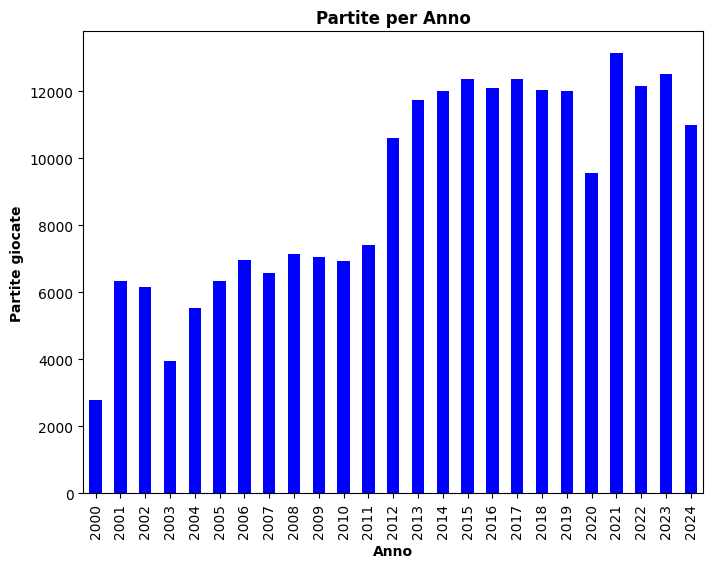

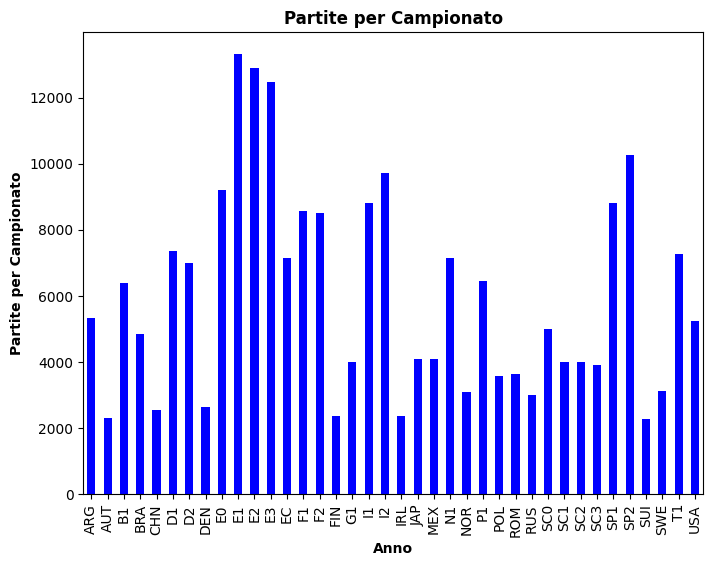

In [4]:
n_matches_per_year=matches_per_year.size()
n_matches_per_year.plot(kind="bar", figsize=(8,6), color="blue")
plt.title("Partite per Anno",fontweight="bold")
plt.xlabel("Anno",fontweight="bold")
plt.ylabel("Partite giocate",fontweight="bold")
plt.show()
#Creo il grafico della quantita' di partite giocate per anno
n_matches_per_league=leagues.size()
n_matches_per_league.plot(kind="bar", figsize=(8,6), color="blue")
plt.title("Partite per Campionato",fontweight="bold")
plt.xlabel("Anno",fontweight="bold")
plt.ylabel("Partite per Campionato",fontweight="bold")
plt.show()
#Creo il grafico della quantita' di partite giocate per campionato

# Numero di gol
Dopo aver capito come fossero organizzati i dati nel DataSet, mi focalizzo sul numero di gol realizzati:
In particolare analizzo:

-**Gol segnati**: la quantita' di reti registrate durante un anno,

-**Media gol**: la quantita' **media** di gol segnati durante un anno,

-**Distrubuzione numero di gol**:frequenza con cui si verifica una certa quantita' di reti.

Analizzo anche se esistono delle diferenze nella quantita' media dei gol segnati nei campionati piu' importanti e in quelli secondari 

#

In [5]:
df_1["Total Goal"]=df_1["FTHome"]+df_1["FTAway"]
#Creo una colonna contenente la somma totale dei gol a partita, sommando le reti della squdra in casa e in trasferta
df_1["Total Goal"].mean()
#Calcolo la media di gol segnati a partita 
goal_per_year=df_1.groupby(df_1["MatchDate"].dt.year)["Total Goal"]
goal_per_year_mean=goal_per_year.mean()
#Calcolo la media dei gol segnati per ogni anno
goal_per_year.sum()
#Calcolo la somma dei gol segnati per anno
top_list=["F1","E0","D1","I1","SP1"]
#Creo una lista contenente i nomi dei top cinque campionati europei(Ligue 1,Premier league,Bundesliga,Serie A,La Liga)
df_top_leagues= df_1[df_1["Division"].isin(top_list)]
#Filtro il dataset originale, selezionando solo le partite dei top campionati menzionati prima
top_leagues=df_top_leagues.groupby("Division")
#Ragruppo le partite per campionato
top_leagues["Total Goal"].mean()
#Calcolo la media dei gol a partita nei principali campionati 
goal_per_year_top_leagues=df_top_leagues.groupby(df_top_leagues["MatchDate"].dt.year)["Total Goal"]
#Calcolo la quantita' di gol segnati per anno nei top campionati
df_minor_leagues=df_1[~df_1["Division"].isin(top_list)]
#Filtro il dataset originale, selezionando solo i campionati "minori" ovvero quelli che non appartengono alla lista di prima
goal_per_year_minor_leagues=df_minor_leagues.groupby(df_minor_leagues["MatchDate"].dt.year)["Total Goal"]
##Calcolo la quantita' di gol segnati per anno nei campionati minori
df_confronto_media=pd.DataFrame({"Top Campionati": goal_per_year_top_leagues.mean(), "Campionati minori":goal_per_year_minor_leagues.mean()})
df_confronto_media
#Creo un dataframe contenente le media di gol segnati per anno nei vari gruppi di campionati; principali e minori
df_confronto_mediana=pd.DataFrame({"Top Campionati": goal_per_year_top_leagues.median(), "Campionati minori":goal_per_year_minor_leagues.median()})
df_confronto_mediana
#Creo un dataframe contenente le mediana di gol segnati per anno nei vari gruppi di campionati; principali e minori
df_confronto_varianza=pd.DataFrame({"Top Campionati": goal_per_year_top_leagues.var(), "Campionati minori":goal_per_year_minor_leagues.var()})
df_confronto_varianza
#Creo un dataframe contenente la varianza di gol segnati per anno nei vari gruppi di campionati; principali e minori

,Top Campionati,Campionati minori
MatchDate,,
2000,2.671297,2.970903
2001,2.827654,2.923285
2002,2.537477,2.878295
2003,2.709197,2.751139
2004,2.771968,2.787841
2005,2.728383,2.716295
2006,2.572144,2.594364
2007,2.731263,2.626032
2008,2.724545,2.690170


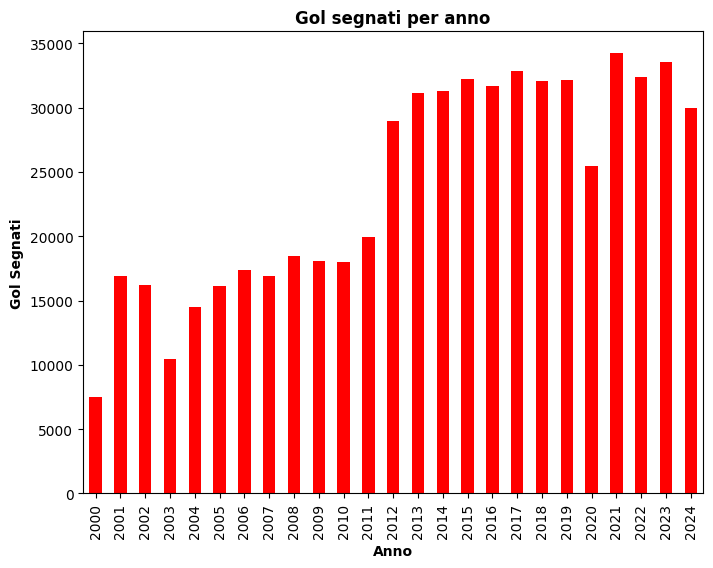

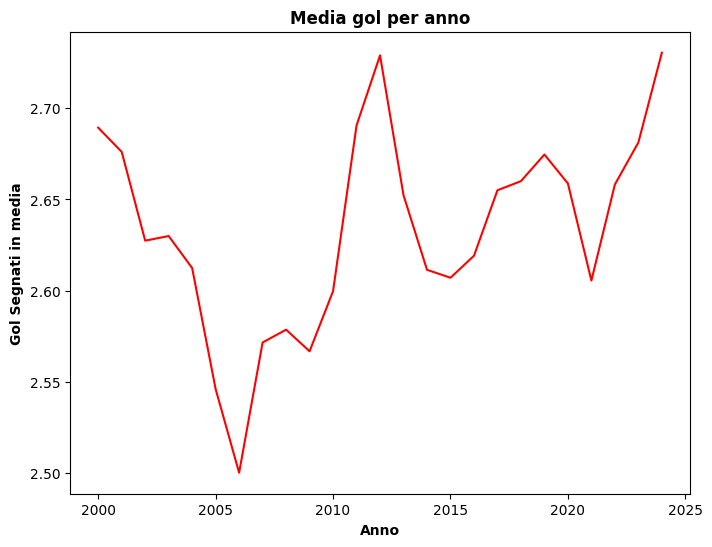

In [6]:
n_goal_per_year_sum=goal_per_year.sum()
n_goal_per_year_sum.plot(kind="bar", figsize=(8,6), color="red")
plt.title("Gol segnati per anno",fontweight="bold")
plt.xlabel("Anno",fontweight="bold")
plt.ylabel("Gol Segnati",fontweight="bold")
plt.show()
#Creo il grafico che rappresenta somma dei gol totale per ogni anno
goal_per_year_mean.plot(kind="line", figsize=(8,6), color="red")
plt.title("Media gol per anno",fontweight="bold")
plt.xlabel("Anno",fontweight="bold")
plt.ylabel("Gol Segnati in media",fontweight="bold")
plt.show()
#Creo il grafico che rappresenta la media dei gol segnati per anno 


#

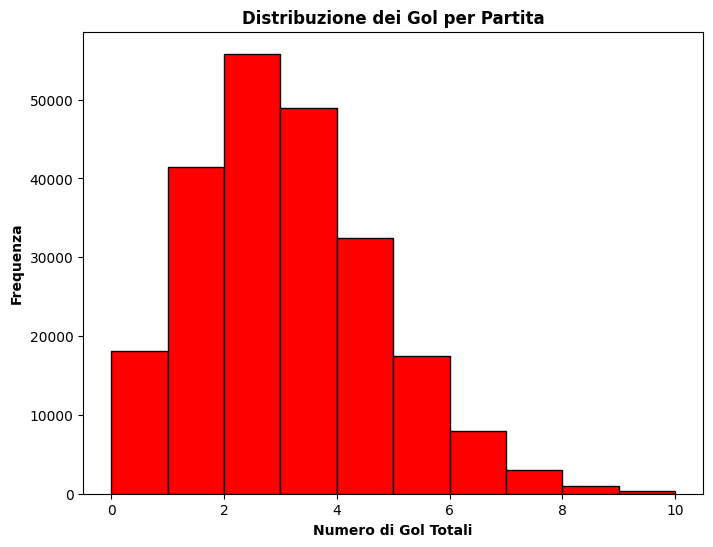

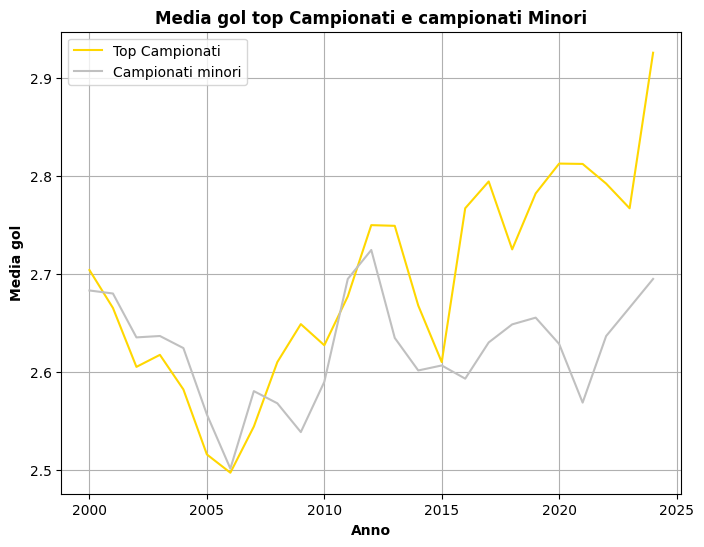

In [7]:
plt.figure(figsize=(8, 6))
df_1["Total Goal"].hist(bins=range(11),color="red", edgecolor="black")
plt.title('Distribuzione dei Gol per Partita',fontweight="bold")
plt.xlabel('Numero di Gol Totali',fontweight="bold")
plt.ylabel('Frequenza',fontweight="bold")
plt.grid(False)
plt.show()
#Creo il grafico che rappresenta la distribuzione della quantita' di gol segnati 
df_confronto_media.plot(kind="line", figsize=(8, 6), color=["gold","silver"])
plt.title("Media gol top Campionati e campionati Minori", fontweight="bold")
plt.xlabel("Anno",fontweight="bold")
plt.ylabel("Media gol",fontweight="bold")
plt.grid(True)
plt.show()
#Creo il grafico che confronta le media dei gol segnati per anno nei campionati principali e nel resto di campionati

#

# L'orario influisce sul risultato?🤔
Mi concentro sull'orario di inizio delle partite; in particolare creo una funzione che in base all'orario di inizio stabilisce se la partita e' stata giocata durante la mattina, il pomeriggio e durante la sera. 

Le fasce che ho determinato sono:

-**Mattina**:(6-12)

-**Pomeriggio**:[12-18)

-**Sera**:[18-23:59)

Dato che il DataSet contiene partite di 42 leghe appartenenti a 27 paesi diversi, filtro i dati e considero solo le partite giocate in Europa per evitare di alterare i risultati considerando partite giocate in fusi orari diversi.


#

In [8]:
df_1_time=df_1.dropna(subset=["MatchTime"]).copy()
#Voglio analizzare l'influenza dell'orario sui risultati, quindi creo una copia del dataset in cui elimino le partite in cui manca tale informazione
df_1_time["MatchTime"].dtype
df_1_time["MatchTime"]=pd.to_datetime(df_1["MatchTime"], format="%H:%M:%S").dt.time
#Come ho fatto prima, trasformo "MatchTime" da tipo object a datetime, indicando che ci interessa solo l'ora e non la data
def fascia_oraria(ora):
    if  datetime.time(6, 0) < ora < datetime.time(12, 0):
        return "mattina"
    elif  datetime.time(12, 0) <= ora < datetime.time(18, 0):
        return "pomeriggio"
    elif datetime.time(18, 0) <= ora < datetime.time(23, 59):
        return "sera"
    else:
        return "altro"
"""Creo una funzione che mi permette di assegnare ad ogni partita una fascia oraria(mattina,pomeriggio, sera, altro), gli orari nel dataset
sono nel fuso orario GMT, ma ci sono partite giocate fuori dall'europa per questo motivo ci sono alcuni orari "inaspettati"(partite giocate durante la notte)"""
df_1_time["FasciaOraria"] = df_1_time["MatchTime"].apply(fascia_oraria)
#Creo una colonna in cui applico la funzione definita prima alle partite, classificandole nelle varie fasce orarie
not_european_leaues=["USA","BRA","ARG","MEX","JAP","RUS","CHN"]
df_european_leagues=df_1_time[~df_1_time["Division"].isin(not_european_leaues)]
#Seleziono solo le partite giocate in europa per evitare le partite con orari "inaspettati"
df_mattina = df_european_leagues[df_european_leagues["FasciaOraria"] == "mattina"]
df_pomeriggio = df_european_leagues[df_european_leagues["FasciaOraria"] == "pomeriggio"]
df_sera = df_european_leagues[df_european_leagues["FasciaOraria"] == "sera"]
df_altro= df_european_leagues[df_european_leagues["FasciaOraria"] == "altro"]
#Ragruppo le partite secondo le fasce orarie, le partite con orari "inaspettati" non vengono prese in considerazione
goal_per_year_mattina=df_mattina.groupby(df_mattina["MatchDate"].dt.year)["Total Goal"]
goal_per_year_pomeriggio=df_pomeriggio.groupby(df_pomeriggio["MatchDate"].dt.year)["Total Goal"]
goal_per_year_sera=df_sera.groupby(df_sera["MatchDate"].dt.year)["Total Goal"]
df_confronto_medie_orari=pd.DataFrame({"Mattina":goal_per_year_mattina.mean(),"Pomeriggio":goal_per_year_pomeriggio.mean(),"Sera":goal_per_year_sera.mean()})
df_confronto_medie_orari
#Come ho fatto in precedenza per confrontare i gol medi per anno, creo un dataframe in cui confronto le medie dei gol segnati nel campioanti europei
#nelle varie fasce orarie per capire se l'orario possa influenzare la quantità media di gol


,Mattina,Pomeriggio,Sera
MatchDate,,,
2012,NaN,2.740781,2.728782
2013,3.000000,2.694466,2.826146
2014,NaN,2.731765,2.721992
2015,2.428571,2.679534,2.722857
2016,2.210526,2.731061,2.704776
2017,3.187500,2.696258,2.740580
2018,1.911765,2.751135,2.736232
2019,2.843750,2.749869,2.612315
2020,2.624113,2.704953,2.594808


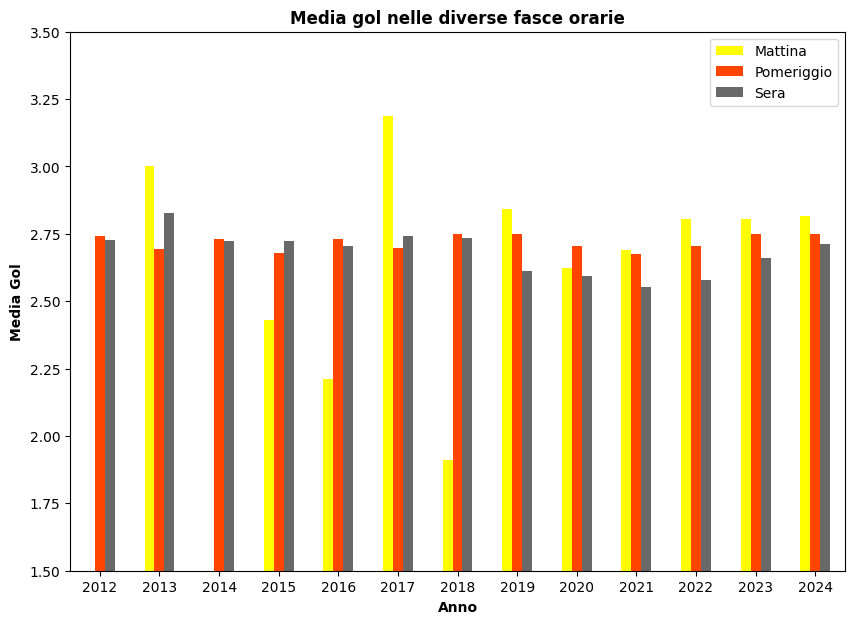

In [9]:
df_confronto_medie_orari.plot(kind="bar", figsize=(10, 7), color=["yellow","orangered","dimgrey"])
plt.title("Media gol nelle diverse fasce orarie",fontweight="bold")
plt.xlabel("Anno",fontweight="bold")
plt.ylabel("Media Gol",fontweight="bold")
plt.xticks(rotation=0)
plt.ylim(1.5,3.5)
plt.show()
#Creo un grafico in cui si descrive la quantita' media di gol segnati nei vari momenti della giornata per ogni anno

# Coefficente Elo
Il coefficente elo e' un metodo matematico che consente di determinare la forma di una squadra in un certo periodo, a seconda dei risultati ottenuti sul campo, voglio capire quanto sia affidabile questo indicatore, andando ad analizzare i risultati delle squadre favorite secondo il coefficente.
La formula per il calcolo e' la seguente:

Rn = Ro + K × (W - We)

Dove "Rn" e' il coefficente aggiornato, "Ro" e' il coefficente precedente (prima dell'ultime partita), "K" e' una costante che rappresenta il coefficente di difficolta' della partita(varia a seconda del tipo di partita), "W" corrisponde al risultato della partita(vale 1 se la squadra vince, 0.5 se pareggia e 0 in caso di sconfitta), "We" infine prende il nome di risultato atteso e si calcola come: We = 1 / (10^(-dr/400) + 1), dove dr e' la differenza dei coefficenti tra le due squadre.


In [10]:
df_elo=df_1.dropna(subset=["HomeElo","AwayElo"]).copy()
#Creo una copia del dataset in cui rimuovo le partite per cui non e' disponibile l'informazione sul coefficente Elo di una delle due squadre
#Il coefficente Elo e' un metodo matematico per calcolare l'abilita' delle squadre e' una stima basata sui risultati """
def fav_team(HomeElo, AwayElo):
    if HomeElo>AwayElo:
        return "Home"
    elif AwayElo>HomeElo:
        return "Away"
    else:
        return "Draw"
#Creo una funzione che mi permette di determinare la squadra favorita secondo il coefficente Elo
df_elo["Squadra Favorita"]=df_elo.apply(lambda match: fav_team(match["HomeElo"], match["AwayElo"]), axis=1)
#Applico la funzione appena creata al dataset, creando una colonna in cui per ogni partita viene stabilita la squadra favorita in base al coefficente
def win(FTHome,FTAway):
    if FTHome>FTAway:
        return"1"
    elif FTAway>FTHome:
        return "2"
    else:
        return "X"
#Creo una funzione che in base al risultato finale determina la squadra vincente 
df_elo["Result"]=df_elo.apply(lambda match: win(match["FTHome"], match["FTAway"]), axis=1)
#Applico la funzione al dataset, creando una colonna in cui per ogni partita in base al risultato viene stabilito l'esito del match (1,X,2)
home_predict_win = df_elo[df_elo["Squadra Favorita"] == "Home"]['Result'].value_counts(normalize=True)
away_predict_win = df_elo[df_elo["Squadra Favorita"] == "Away"]['Result'].value_counts(normalize=True)
#Determino la distribuzione dei risultati quando la squadra di casa e' favorita e quando lo e' la squadra in trasferta
df_confronto_prediction=pd.DataFrame({"Squadra di casa favorita:":home_predict_win,"Squadra in trasferta favorita:":away_predict_win})
df_confronto_prediction
# 1 corrisponde alla vittoria della squadra di casa, X il pareggio e 2 la vittoria della squadra in trasferta 

,Squadra di casa favorita:,Squadra in trasferta favorita:
Result,,
1,0.583520,0.319999
2,0.168555,0.391462
X,0.247925,0.288539


#

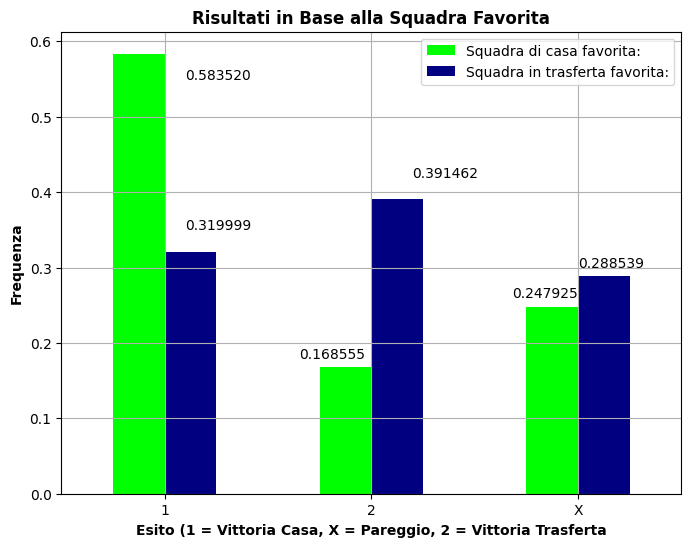

In [44]:
df_confronto_prediction.plot(kind="bar", figsize=(8, 6), color=["lime","navy"])
plt.title("Risultati in Base alla Squadra Favorita",fontweight="bold")
plt.xlabel("Esito (1 = Vittoria Casa, X = Pareggio, 2 = Vittoria Trasferta",fontweight="bold")
plt.ylabel("Frequenza",fontweight="bold")
plt.xticks(rotation=0)
plt.grid(True)
plt.annotate("0.583520",xy=(0.1,0.55))
plt.annotate("0.319999",xy=(0.1,0.35))
plt.annotate("0.168555",xy=(0.65,0.18))
plt.annotate("0.391462",xy=(1.2,0.42))
plt.annotate("0.247925",xy=(1.68,0.26))
plt.annotate("0.288539",xy=(2,0.3))
plt.show()
#Creo un grafico che mostra la frequenza di vittorie,pareggi e sconfitte delle squadre favorita secodo l'elo

# Conclusioni
L'analisi di questi dati mi ha permesso di capire come il calcio sia camiato negli ultimi anni, mi ha fatto scoprire l'esistenza del coefficente elo di cui prima non ero a conoscenza,e che rappresenta una valida stima della forza di una squadra.

Le principali conclusioni che posso trarre dall'analisi dei dati sono:

-Si segna di piu' mediamente oggi rispetto al passato, questo fatto potevo aspettarmelo in quanto prima la maggior parte delle squadre avevano un modo di giocare piu' difensivo e si lavorava molto di meno sulla parte tattica e fisica,

-L'introduzione di regole piu' restrittive per quanto riguarda il fuorigioco ha causato una significativa diminuzione dei gil segnati mediamente, soprattutto all'inizio,

-Con l'introduzione del VAR mi aspettavo una diminuzione dei gol segnati ma non e' stato cosi' infatti tra il 2015 e il 2020( anno in cui ci fu la pandemia, che ha causato una diminuzione della quantita' di reti segnate),la media dei gol e' sempre stata in aumento,

-Oggi si segna molto di piu' nei campionati principali rispetto a quelli secondari, in passato la differenza era molto minore,

-Negli ultimi anni si segna di piu' nelle partite giocate nella mattina/pomeriggio rispetto alle partite giocate la sera